In [76]:
!rm -R AML2021
!git clone https://github.com/sleuoth-hof/AML2021.git

Cloning into 'AML2021'...
remote: Enumerating objects: 2950, done.
remote: Counting objects: 100% (2950/2950), done.
remote: Compressing objects: 100% (1844/1844), done.
remote: Total 2950 (delta 1073), reused 2935 (delta 1061), pack-reused 0
Receiving objects: 100% (2950/2950), 32.50 MiB | 26.99 MiB/s, done.
Resolving deltas: 100% (1073/1073), done.


In [77]:
_file_dir = './AML2021/emotion-recognition/'

In [78]:
from tensorflow.keras.models import model_from_json
import numpy as np
import tensorflow as tf

class FacialExpressionModel(object):

    EMOTIONS_LIST = ["Angry", "Disgust", "Fear", "Happy", "Neutral","Sad","Surprised"]
    
    def __init__(self, model_json_file, model_weights_file):
        with open(model_json_file,"r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()

    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]

In [79]:
import cv2
import numpy as np

facec = cv2.CascadeClassifier(_file_dir + 'haarcascade_frontalface_default.xml')
model = FacialExpressionModel(_file_dir + "model.json", _file_dir + "model_weights.h5")


In [80]:
!pip install kafka-python

b'{"id": "happy_women", "face_nr": 3, "object_box": [278, 25, 150, 150], "image_cut_out": "/9j/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAE6AnQDASIAAhEBAxEB/8QAHAAAAgIDAQEAAAAAAAAAAAAABQYDBAACBwEI/8QARhAAAQMDAgQDBgMFBwIFBAMAAQIDEQAEIQUxBhJBURNhcQcUIoGRoTKxwRUjM9HwCCQ0QlJy4WLxFiU2U4I1Q3OSZKKy/8QAGwEAAgMBAQEAAAAAAAAAAAAAAwQBAgUABgf/xAA2EQACAgEEAQMCBQIEBgMAAAABAgADEQQSITFBEyJRBTIUYXGBkSOxBjOh8BVCwdHh8SRSYv/aAAwDAQACEQMRAD8A+nl26oxH1qq408kz4ZI8hNEQ4k9RW4IIogsIgigPRlFlR2UCD2Ig1bTtUhAO9eAAbAVUtmSExIztVZZAOcVcUkERNVH2HDlEEdtjVlI8yrKRBupEkduxoOtDk8wUR5TTA/bLcbIWkg+lBrtt1gkKQSgncDas/XaQMfVX95m3KQcnqW+HXlIunGXP845h8qZaSGHeR1K2zC0GRTbZ3SbtlLiCM4I7Gr6VvZtMa0dowU8yyuYxXiFcwmtqgSrlcUDsaYJxGycGT1lahYJgHNbVwOZeZXhHevaypnSuBzK5eg3qcAARWqUhMx1zXomM1A/OUVcT0DFe1lZUy8ysrKyunTKysrK6dMrKysrp0ysrKyunTKysrK6dMrKysrp0ysrKyunTKysrDXTplZNDr29DC20JKUlRMlRjlAHbrSBxJxjcM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


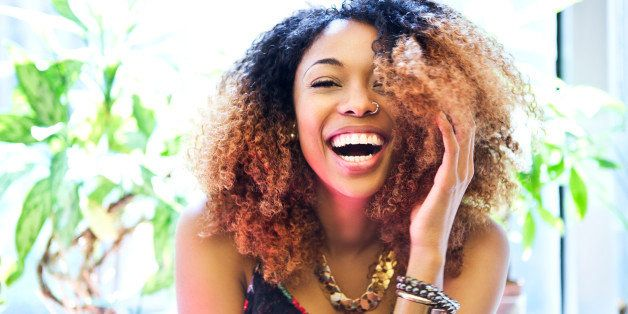

Happy
b'{"id": "happy_women", "face_nr": 3, "box": [278, 25, 150, 150], "emotion": "Happy", "image_cut_out": "/9j/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAE6AnQDASIAAhEBAxEB/8QAHAAAAgIDAQEAAAAAAAAAAAAABQYDBAACBwEI/8QARhAAAQMDAgQDBgMFBwIFBAMAAQIDEQAEIQUxBhJBURNhcQcUIoGRoTKxwRUjM9HwCCQ0QlJy4WLxFiU2U4I1Q3OSZKKy/8QAGwEAAgMBAQEAAAAAAAAAAAAAAwQBAgUABgf/xAA2EQACAgEEAQMCBQIEBgMAAAABAgADEQQSITFBEyJRBTIUYXGBkSOxBjOh8BVCwdHh8SRSYv/aAAwDAQACEQMRAD8A+nl26oxH1qq408kz4ZI8hNEQ4k9RW4IIogsIgigPRlFlR2UCD2Ig1bTtUhAO9eAAbAVUtmSExIztVZZAOcVcUkERNVH2HDlEEdtjVlI8yrKRBupEkduxoOtDk8wUR5TTA/bLcbIWkg+lBrtt1gkKQSgncDas/XaQMfVX95m3KQcnqW+HXlIunGXP845h8qZaSGHeR1K2zC0GRTbZ3SbtlLiCM4I7Gr6VvZtMa0dowU8yyuYxXiFcwmtqgSrlcUDsaYJxGycGT1lahYJgHNbVwOZeZXhHevaypnSuBzK5eg3qcAARWqUhMx1zXomM1A/OUVcT0DFe1lZUy8ysrKyunTKysrK6dMrKysrp0ysrKyunTKysrK6dMrKysrp0ysrKyunTKysrDXTplZNDr29DC20JKU

KeyboardInterrupt: ignored

In [81]:
from kafka import KafkaConsumer
from kafka import KafkaProducer
import json
from google.colab.patches import cv2_imshow


producer = KafkaProducer(bootstrap_servers='ec2-3-80-52-188.compute-1.amazonaws.com:9092')

consumer = KafkaConsumer('faces_found_detail', bootstrap_servers=['ec2-3-80-52-188.compute-1.amazonaws.com:9092'], auto_offset_reset='latest')


for message in consumer:

 print(message.value)

 data = json.loads(message.value)

 img = base64.b64decode(data["image_cut_out"]); 

 
 npimg = np.fromstring(img, dtype=np.uint8); 
 fr = cv2.imdecode(npimg, 1)

 cv2_imshow(fr)

 gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
 faces = facec.detectMultiScale(gray_fr, 1.3, 5)

 (x,y,w,h) = data["object_box"]

 fc = gray_fr[y:y+h, x:x+w]

 roi = cv2.resize(fc, (48, 48))
 pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])

 print(pred)

 j = {
     "id": data["id"],
     "face_nr": data["face_nr"],
     "box": [x, y, w, h],
     "emotion": pred,
     "image_cut_out": data["image_cut_out"] 
 }

 print(str.encode(json.dumps(j)))

 producer.send('gui-response_emotion', str.encode(json.dumps(j)))